Original DataFrame:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

DataFrame after replacing missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Model performance without handling missing values (MSE): 0.18715395657928005
Model performance with missing values imputed (MSE): 0.18715395657928005

DataFrame after removing duplicates:
(891, 12)

Data types in the dataset:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float6

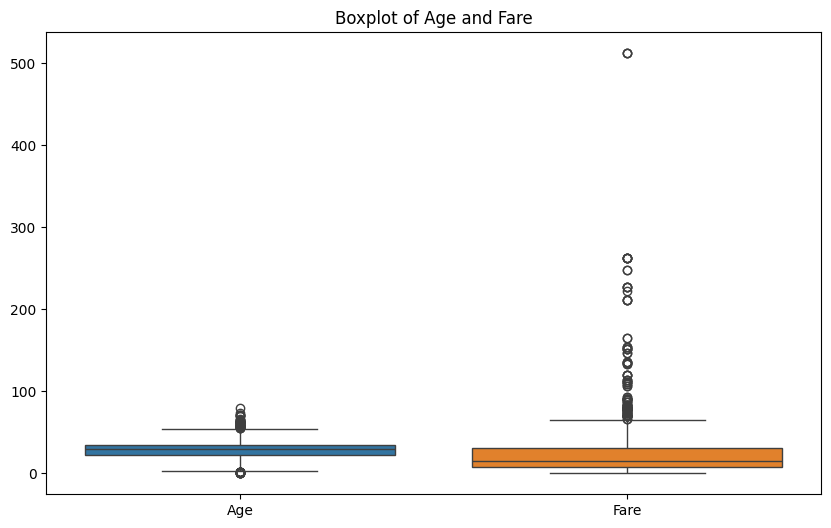


DataFrame after removing outliers:
              Age        Fare
count  721.000000  721.000000
mean    28.476085   17.389845
std     10.043466   13.563036
min      3.000000    0.000000
25%     22.000000    7.895800
50%     29.699118   12.275000
75%     33.000000   26.000000
max     54.000000   65.000000


In [1]:
# Importance of Data Cleaning

# 1. Missing Values: Missing data points in a dataset can lead to biased results.
#     Task 1: Load a dataset and identify which columns have missing values.
#     Task 2: Replace missing values in a dataset with the column mean or mode.
#     Task 3: Compare model performance with and without handling missing values.
    

# 2. Duplicate Data: Repeated data points can skew analysis and model results.
#     Task 1: Identify and remove duplicate entries from a dataset using a programming language or tool.
#     Task 2: Document the before-and-after dataset shape to understand the impact of duplicates.
#     Task 3: Explain to a classmate how duplicate data can affect prediction accuracy.
    
        
            
# 3. Incorrect Data Types: Data stored in incorrect formats can lead to parsing errors or incorrect analysis.
#     Task 1: Convert a column of string numbers to integers in a dataset.
#     Task 2: Identify and correct columns with inconsistent data types in a dataset.
#     Task 3: Discuss why correct data types are critical for feature engineering.
    
        
            

# 4. Outliers & Inconsistencies: Irregularities in data can mislead statistical analysis and model predictions.
#     Task 1: Visualize a dataset and identify outliers using a boxplot.
#     Task 2: Remove or adjust outliers and re-analyze the dataset.
#     Task 3: Research and report on a technique for handling outliers effectively.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Task 1: Load a dataset and identify which columns have missing values.
# Example dataset: Use the Titanic dataset as an example.
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

print("Original DataFrame:")
print(df.isnull().sum())  # Check for missing values

# Task 2: Replace missing values with the column mean or mode
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Replace missing 'Age' with mean
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Replace missing 'Embarked' with mode
print("\nDataFrame after replacing missing values:")
print(df.isnull().sum())

# Task 3: Compare model performance with and without handling missing values.
# Split the data into features (X) and target (y)
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

# Without handling missing values (model will not work because of NaN values)
X_no_imputation = X.copy()
y_no_imputation = y

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_no_imputation, y_no_imputation, test_size=0.2, random_state=42)

# Model: Linear Regression (as an example)
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_no_imputation = model.predict(X_test)
mse_no_imputation = mean_squared_error(y_test, y_pred_no_imputation)

# Now handle missing values
X_imputed = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Train and evaluate the model again with imputation
model.fit(X_train, y_train)
y_pred_imputed = model.predict(X_test)
mse_imputed = mean_squared_error(y_test, y_pred_imputed)

# Print comparison of model performance
print("\nModel performance without handling missing values (MSE):", mse_no_imputation)
print("Model performance with missing values imputed (MSE):", mse_imputed)


# 2. Duplicate Data Handling
# Task 1: Identify and remove duplicate entries from the dataset
df_duplicates = df.copy()
df_duplicates.drop_duplicates(inplace=True)
print("\nDataFrame after removing duplicates:")
print(df_duplicates.shape)

# Task 2: Checking the unique data types in a dataset
print("\nData types in the dataset:")
print(df.dtypes)

# Task 3: Why correct data types are critical for feature engineering
# Explanation:
# - Numeric features should be of a numeric data type (e.g., float or int) for proper statistical analysis.
# - Categorical features should be of a category or object data type for proper encoding and modeling.
# - Misclassified data types can lead to errors or incorrect model performance.

# 4. Outliers & Inconsistencies:
# Task 1: Visualize a dataset and identify outliers using a boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title('Boxplot of Age and Fare')
plt.show()

# Task 2: Remove or adjust outliers and re-analyze the dataset
# Removing outliers based on the IQR method (for 'Age' and 'Fare')
Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df[['Age', 'Fare']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Fare']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nDataFrame after removing outliers:")
print(df_cleaned[['Age', 'Fare']].describe())

# Task 3: Report on a technique for handling outliers effectively
# One common method for handling outliers is the **IQR method** (Interquartile Range):
# - Calculate Q1 (25th percentile) and Q3 (75th percentile) of the data.
# - Compute IQR = Q3 - Q1.
# - Remove data points outside the range: [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].
    
        
            


In [ ]:
# 3. Incorrect Data Types: Data stored in incorrect formats can lead to parsing errors or incorrect analysis.
#     Task 1: Convert a column of string numbers to integers in a dataset.
#     Task 2: Identify and correct columns with inconsistent data types in a dataset.
#     Task 3: Discuss why correct data types are critical for feature engineering.
    
    
    

In [ ]:
# 4. Outliers & Inconsistencies: Irregularities in data can mislead statistical analysis and model predictions.
#     Task 1: Visualize a dataset and identify outliers using a boxplot.
#     Task 2: Remove or adjust outliers and re-analyze the dataset.
#     Task 3: Research and report on a technique for handling outliers effectively.
    
    
    